<a href="https://colab.research.google.com/github/noorelhaj98-ship-it/pytorch-tutorial/blob/main/neuralnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import torch
import torch.nn as nn
import torch.nn.functional as F


In [ ]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x



In [ ]:
torch.manual_seed(41)
model=Model()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url='https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df=pd.read_csv(url)

In [ ]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
my_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [ ]:
species_mapping = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
my_df['species'] = my_df['species'].map(species_mapping)

In [ ]:
x=my_df.drop('species',axis=1)
y=my_df['species']

In [ ]:
x=x.values
y=y.values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=41)


In [ ]:
x_train=torch.FloatTensor(x_train)
x_test=torch.FloatTensor(x_test)

In [ ]:
import numpy as np

# Assuming y_train and y_test now contain numerical labels from previous preprocessing
# Convert to torch.LongTensor for classification labels
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [ ]:
epochs=100
losses=[]
for i in range(epochs):
  y_pred=model.forward(x_train)
  loss=criterion(y_pred,y_train)
  losses.append(loss.detach().numpy())
  if i % 10 == 0 :
     print(f'Epoch: {i} and loss : {loss}')
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



Epoch: 0 and loss : 1.1251550912857056
Epoch: 10 and loss : 1.0096259117126465
Epoch: 20 and loss : 0.8157405853271484
Epoch: 30 and loss : 0.585706353187561
Epoch: 40 and loss : 0.3999636471271515
Epoch: 50 and loss : 0.2676880657672882
Epoch: 60 and loss : 0.17942363023757935
Epoch: 70 and loss : 0.12151690572500229
Epoch: 80 and loss : 0.0860118418931961
Epoch: 90 and loss : 0.06520850956439972


Text(0.5, 0, 'Epochs')

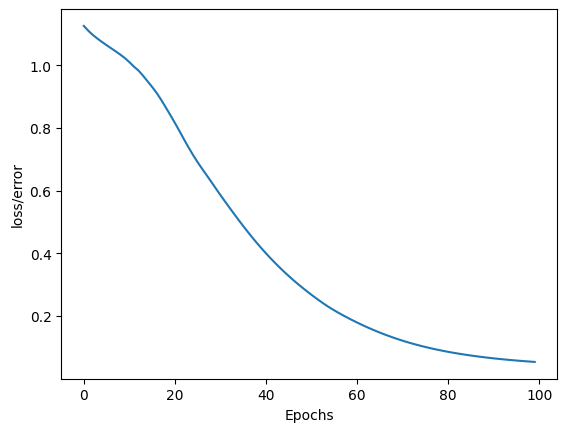

In [ ]:
plt.plot(range(epochs),losses)
plt.ylabel('loss/error')
plt.xlabel('Epochs')

In [ ]:
with torch.no_grad():
  y_eval=model.forward(x_test)
  loss=criterion(y_eval,y_test)

In [ ]:
loss

tensor(0.1315)

In [ ]:
correct=0
with torch.no_grad():
  for i , data in enumerate(x_test):
    y_val=model.forward(data)


    if y_test[i]==0:
      x="Setosa"
    elif y_test[i] == 1:
      x="Versicolor"
    else:
      x="Virginica"
    print(f'{i+1}){str(y_val)} \t {x} \t{y_val.argmax().item()} ')

    if y_val.argmax().item()==y_test[i]:
      correct+=1

print(f'we got {correct} correct!')


1)tensor([-5.8760,  4.4628,  6.5124]) 	 Virginica 	2 
2)tensor([-7.5436,  4.1670,  9.7255]) 	 Virginica 	2 
3)tensor([-8.4504,  5.1271, 10.1987]) 	 Virginica 	2 
4)tensor([-4.3398,  5.6267,  2.5608]) 	 Versicolor 	1 
5)tensor([-7.1825,  4.8754,  8.2992]) 	 Virginica 	2 
6)tensor([-3.3974,  5.3463,  1.2803]) 	 Versicolor 	1 
7)tensor([-5.9231,  4.9822,  5.9997]) 	 Virginica 	2 
8)tensor([-4.2881,  5.7003,  2.3889]) 	 Versicolor 	1 
9)tensor([-6.5356,  4.9257,  7.1260]) 	 Virginica 	2 
10)tensor([-8.0509,  4.4129, 10.3286]) 	 Virginica 	2 
11)tensor([-5.6762,  4.9500,  5.6215]) 	 Virginica 	2 
12)tensor([ 4.5662, -2.2476, -2.8911]) 	 Setosa 	0 
13)tensor([ 4.2571, -1.9967, -2.7330]) 	 Setosa 	0 
14)tensor([-2.1108,  4.0515,  0.5799]) 	 Versicolor 	1 
15)tensor([ 3.4575, -1.2098, -2.3514]) 	 Setosa 	0 
16)tensor([-5.4724,  5.1165,  5.0934]) 	 Virginica 	1 
17)tensor([ 4.0557, -1.7949, -2.6492]) 	 Setosa 	0 
18)tensor([-5.8075,  4.6053,  6.2458]) 	 Versicolor 	2 
19)tensor([ 4.4343, -2.139